In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
df = pd.read_csv("Sample - Superstore.csv",encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
# Convert date column
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')
daily_sales.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [13]:
daily_sales['Year'] = daily_sales['Order Date'].dt.year
daily_sales['Month'] = daily_sales['Order Date'].dt.month
daily_sales['Day'] = daily_sales['Order Date'].dt.day
daily_sales['DayOfWeek'] = daily_sales['Order Date'].dt.dayofweek

In [14]:
X = daily_sales[['Year', 'Month', 'Day', 'DayOfWeek']]
y = daily_sales['Sales']

In [15]:
train_size = int(len(daily_sales) * 0.8)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
predictions = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1756.6584944000772
RMSE: 2386.6704503265623


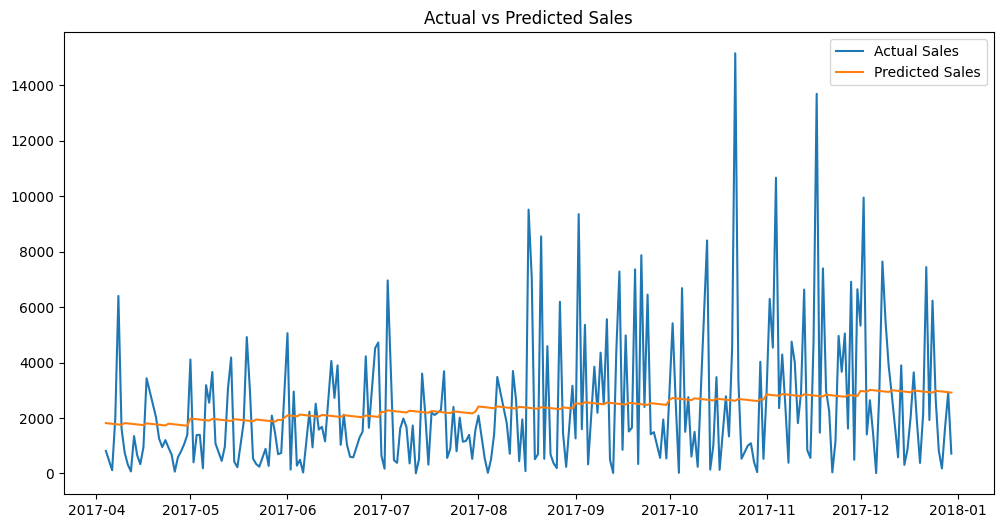

In [19]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Order Date'][train_size:], y_test, label='Actual Sales')
plt.plot(daily_sales['Order Date'][train_size:], predictions, label='Predicted Sales')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

In [20]:
future_dates = pd.date_range(start=daily_sales['Order Date'].max(), periods=30)

future_df = pd.DataFrame()
future_df['Order Date'] = future_dates
future_df['Year'] = future_df['Order Date'].dt.year
future_df['Month'] = future_df['Order Date'].dt.month
future_df['Day'] = future_df['Order Date'].dt.day
future_df['DayOfWeek'] = future_df['Order Date'].dt.dayofweek

future_predictions = model.predict(future_df[['Year','Month','Day','DayOfWeek']])

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(future_df['Order Date'], future_predictions)
plt.title("Next 30 Days Sales Forecast")
plt.show()